In [10]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("mlfolder/CSV_Files/penguinClean.csv")

In [7]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [9]:
data.shape

(333, 7)

In [3]:
def minMaxScaler(X):
    xmin=np.min(x) #min(x)
    xmax=np.max(x)
    x_new=(x-xmin)/(xmax-xmin)
    return x_new

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
model1=MinMaxScaler()

In [ ]:
model.fit_transform()

**plt.hist()**

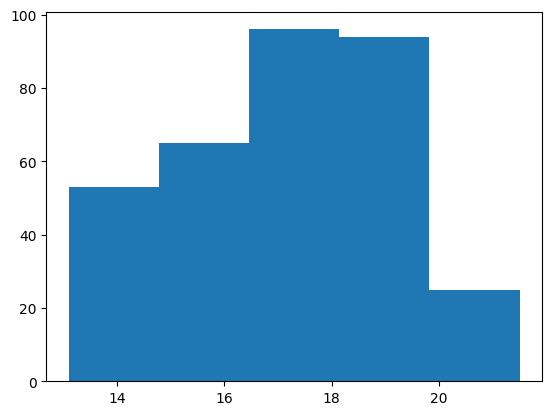

In [13]:
cnt,bins,x=plt.hist(data.bill_depth_mm,bins=5)

In [14]:
cnt

array([53., 65., 96., 94., 25.])

In [15]:
bins

array([13.1 , 14.78, 16.46, 18.14, 19.82, 21.5 ])

In [16]:
x

<BarContainer object of 5 artists>

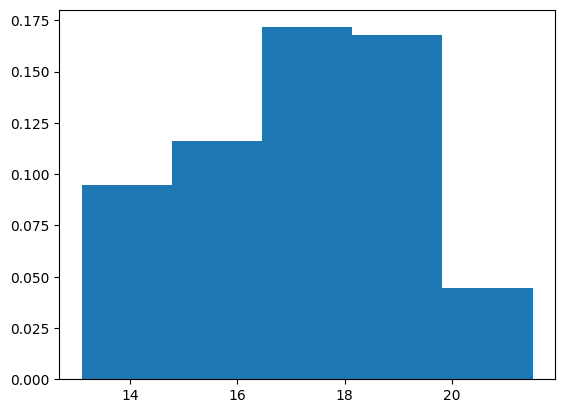

In [17]:
#density=True gives fractions in each bin rather than count
cnt,bins,x=plt.hist(data.bill_depth_mm,bins=5,density=True)

In [18]:
print("cnt",cnt)
print("bins",bins)

cnt [0.09473759 0.11618762 0.17160017 0.16802517 0.04468754]
bins [13.1  14.78 16.46 18.14 19.82 21.5 ]


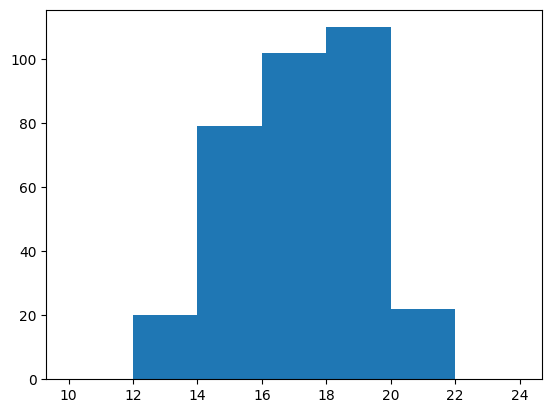

In [20]:
#we can specify the bin edges
cnt,bins,x=plt.hist(data.bill_depth_mm,bins=[10,12,14,16,18,20,22,24])
#counts values in the bins [10,12)[12,14)[14,16)[16,18)[18,20)[20,22)[22,24)p

In [21]:
cnt

array([  0.,  20.,  79., 102., 110.,  22.,   0.])

In [22]:
bins

array([10., 12., 14., 16., 18., 20., 22., 24.])

In [23]:
#draw histogram of body_mass_g .How many datapoints are in the interval[40000,50000)
bm=data.iloc[:,[0,5,6]]

In [29]:
grp=bm.groupby(['species'])

In [30]:
grouped=[grp.get_group(x) for x in grp.groups]

/var/folders/xg/s9m7jggd71l_jz7165_k_bmh0000gn/T/ipykernel_2496/826013795.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped=[grp.get_group(x) for x in grp.groups]


In [31]:
grouped[1]

,species,body_mass_g,sex
146,Chinstrap,3500.0,Female
147,Chinstrap,3900.0,Male
148,Chinstrap,3650.0,Male
149,Chinstrap,3525.0,Female
150,Chinstrap,3725.0,Male
...,...,...,...
209,Chinstrap,4000.0,Male
210,Chinstrap,3400.0,Female
211,Chinstrap,3775.0,Male
212,Chinstrap,4100.0,Male


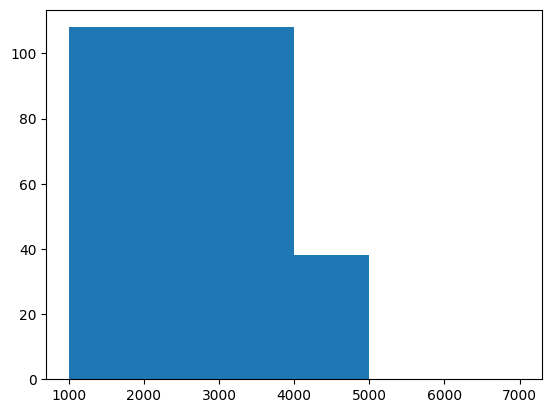

In [32]:
cnt,bins,x=plt.hist(grouped[0].body_mass_g,bins=[1000,4000,5000,7000])

In [33]:
cnt

array([108.,  38.,   0.])

In [34]:
bins

array([1000., 4000., 5000., 7000.])

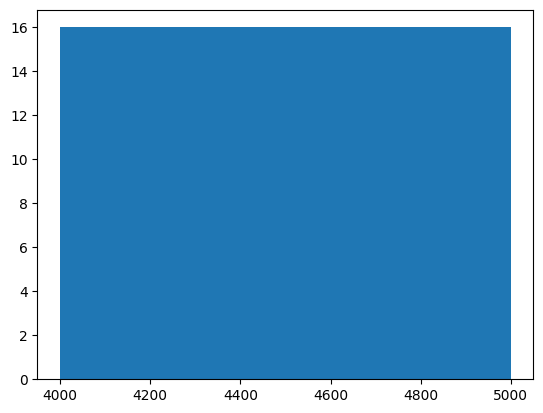

In [35]:
cnt,bins,x=plt.hist(grouped[1].body_mass_g,bins=[4000,5000])

In [36]:
cnt

array([16.])

In [37]:
bins

array([4000., 5000.])

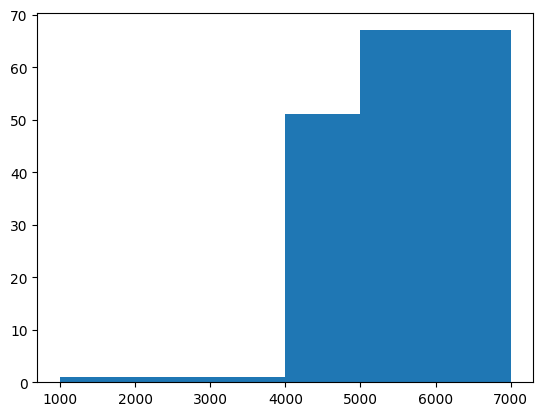

In [38]:
cnts, bins,x= plt.hist(grouped[2].body_mass_g, bins=[1000, 4000, 5000,7000])

In [39]:
cnts

array([ 1., 51., 67.])

In [40]:
bins

array([1000., 4000., 5000., 7000.])

**Logistic Regression Model**

In [41]:
trainData=data.iloc[:,[0,2,4]]
xtrain=data.iloc[:,[2,4]]
ytrain=data.iloc[:,0]

In [42]:
from sklearn.linear_model import LogisticRegression

In [45]:
logReg=LogisticRegression(solver='liblinear')
logReg.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [46]:
#encoding species data using np.unique()
speciesListInt=np.unique(trainData['species'],return_inverse=True)[1].tolist()

/Users/divyamaddipatla/mlfolder/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


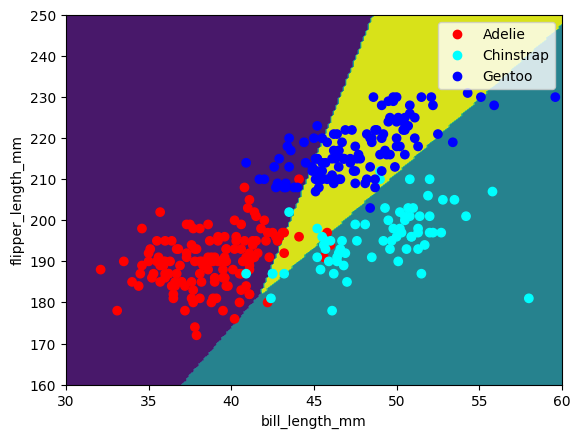

<Figure size 640x480 with 0 Axes>

In [55]:
#plotting decision boundary
xgrid=np.linspace(30,60,200)
ygrid=np.linspace(160,250,200)
X,Y=np.meshgrid(xgrid,ygrid)
Z=logReg.predict(np.c_[X.ravel(),Y.ravel()])
Z=Z.reshape(X.shape)
Z2=np.unique(Z, return_inverse=True)[1].tolist()
Z3=np.reshape(Z2,(200,200))
fig,ax=plt.subplots()
plt.contourf(X,Y,Z3)
scatter=ax.scatter(trainData['bill_length_mm'],trainData['flipper_length_mm'],c=speciesListInt,cmap=matplotlib.colors.ListedColormap(['red','cyan','blue']))
plt.xlabel('bill_length_mm')
plt.ylabel('flipper_length_mm')
handles, labels = scatter.legend_elements(prop='colors')
labels=['Adelie', 'Chinstrap', 'Gentoo']
ax.legend(handles, labels)
# ax.legend()
plt.show()
plt.savefig('scaling.png')